In [1]:
import pandas as pd

In [2]:
raw_df=pd.read_csv('insurance.csv')

In [3]:
raw_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
inputs=raw_df[['age','sex','bmi','children','smoker','region']]
target=raw_df['charges']

In [5]:
numerical_cols=['age','bmi','children']

In [6]:
from sklearn.model_selection import train_test_split
inputs_train,input_test,target_train,target_test=train_test_split(inputs, target, test_size=0.25, random_state=42)

In [7]:
dict1={'no':0,'yes':1}

In [8]:
dict2={'male':1,'female':0}

In [9]:
dict3={'southeast':1,'southwest':2,'northeast':3,'northwest':4}

In [10]:
raw_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
inputs_train['smoker']=inputs_train.smoker.map(dict1)
input_test['smoker']=input_test.smoker.map(dict1)

In [12]:
inputs_train['sex']=inputs_train.sex.map(dict2)
input_test['sex']=input_test.sex.map(dict2)

In [1]:
inputs_train['region']=inputs_train.region.map(dict3)
input_test['region']=input_test.region.map(dict3)

NameError: name 'inputs_train' is not defined

In [14]:
input_test

,age,sex,bmi,children,smoker,region
764,45,0,25.175,2,0,3
887,36,0,30.020,0,0,4
890,64,0,26.885,0,1,4
1293,46,1,25.745,3,0,4
259,19,1,31.920,0,1,4
...,...,...,...,...,...,...
342,60,0,27.550,0,0,3
308,58,1,34.865,0,0,3
1128,34,1,32.800,1,0,2
503,19,1,30.250,0,1,1


In [15]:
inputs_train

,age,sex,bmi,children,smoker,region
693,24,1,23.655,0,0,4
1297,28,0,26.510,2,0,1
634,51,1,39.700,1,0,2
1022,47,1,36.080,1,1,1
178,46,0,28.900,2,0,2
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,3
1130,39,0,23.870,5,0,1
1294,58,1,25.175,0,0,3
860,37,0,47.600,2,1,2


In [16]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
model=DecisionTreeRegressor(max_depth=4,random_state=42)

In [101]:
model.fit(inputs_train,target_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [102]:
preds=model.predict(inputs_train)

In [103]:
preds

array([ 5653.08998613,  7233.79968598, 10845.96726028, ...,
       12845.40752091, 42764.66477585, 12845.40752091])

In [89]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [104]:
from sklearn.metrics import r2_score

In [90]:
loss=rmse(target_train,preds)

In [105]:
score_train=r2_score(target_train,preds)

In [106]:
score_train

0.8683988486994809

In [91]:
loss

4369.675373437824

In [92]:
predict=model.predict(input_test)

In [93]:
loss_test=rmse(target_test,predict)

In [108]:
score_test=r2_score(target_test,predict)

In [109]:
score_test

0.8478903274924622

In [94]:
model.tree_.max_depth

4

In [95]:
loss_test

4790.824756213742

In [96]:
def max_depth_error(md):
    model = DecisionTreeRegressor(max_depth=md,random_state=42)
    model.fit(inputs_train,target_train)
    train_acc = rmse(target_train,model.predict(inputs_train))
    test_acc =rmse(target_test,model.predict(input_test))
    return {'Max Depth': md, 'Training Error': train_acc, 'test Error': test_acc}

In [97]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [98]:
errors_df

,Max Depth,Training Error,test Error
0,1,7507.898794,7337.623606
1,2,5011.886969,5196.427216
2,3,4538.644940,5012.129573
3,4,4369.675373,4790.824756
4,5,4165.803772,4811.772628
5,6,3903.047943,5216.870206
6,7,3511.477618,5790.336089
7,8,3041.234357,5566.331269
8,9,2493.416012,6391.270719
9,10,2080.832509,6334.978865


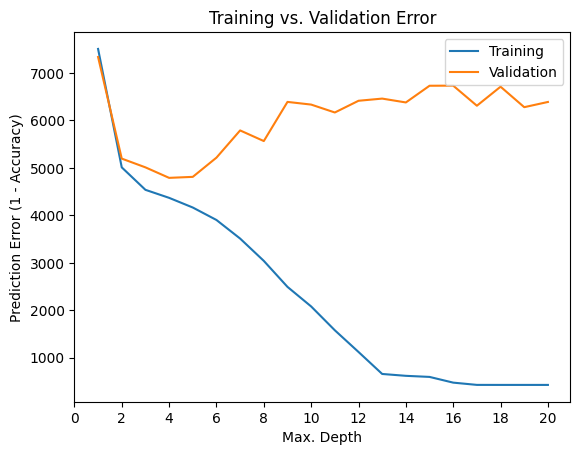

In [99]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['test Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])